In [1]:
import pandas as pd

# 1. Cargar el dataset de Telecomunicaciones (Fuga de Clientes)
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/TelecomCustomerChurn.csv"
df = pd.read_csv(url)

# 2. Diagnóstico del Ingeniero: ¿Qué tipo de datos tenemos?
print("--- Estructura del Dataset ---")
df.info()

# 3. Ver las primeras filas
print("\n--- Vista Previa de Datos ---")
display(df.head())

--- Estructura del Dataset ---
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   Gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [2]:
# 1. Convertir TotalCharges a numérico
# errors='coerce' transformará los espacios vacíos en 'NaN' (nulos)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Limpieza de Nulos: Eliminamos las filas que quedaron vacías
df.dropna(inplace=True)

# 3. Eliminar columnas que no aportan al modelo predictivo (como el ID)
# Esto reduce el ruido para la Inteligencia Artificial
df.drop('customerID', axis=1, inplace=True, errors='ignore')

# 4. Verificamos los cambios
print("--- Diagnóstico tras limpieza ---")
print(f"Tipo de dato TotalCharges: {df['TotalCharges'].dtype}")
print(f"Total de registros finales: {df.shape[0]}")
df.head()

--- Diagnóstico tras limpieza ---
Tipo de dato TotalCharges: float64
Total de registros finales: 7032


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


C:\Users\JULIUS\AppData\Local\Temp\ipykernel_7484\439053094.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


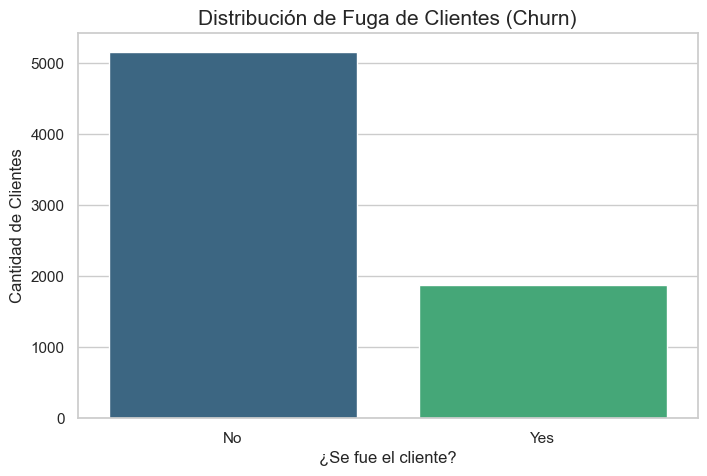

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

# 1. Crear un gráfico de barras para ver cuántos se quedan vs cuántos se van
ax = sns.countplot(x='Churn', data=df, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de Fuga de Clientes (Churn)', fontsize=15)
plt.xlabel('¿Se fue el cliente?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# Mostrar el gráfico
plt.show()

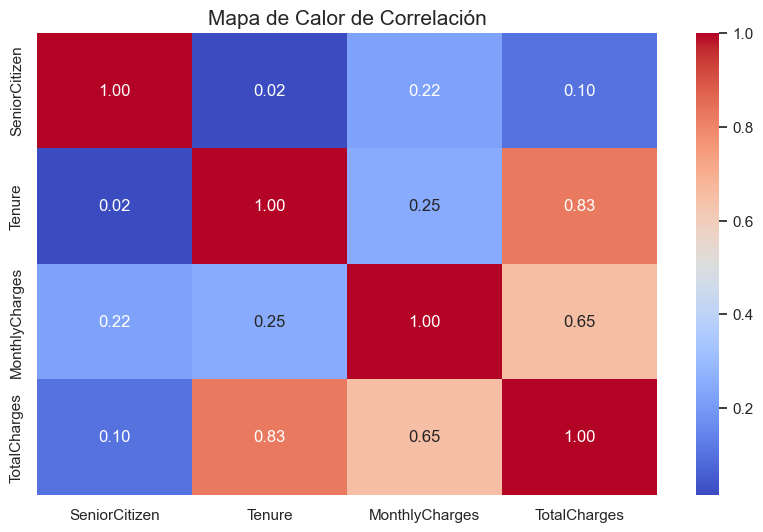

In [5]:
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Seleccionamos solo las columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=[np.number])

# Creamos un Mapa de Calor (Heatmap)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Calor de Correlación', fontsize=15)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

# 1. Creamos una copia para no alterar el original por seguridad
df_ml = df.copy()

# 2. Inicializamos el codificador
le = LabelEncoder()

# 3. Lista de columnas que son texto (categóricas)
col_categoricas = df_ml.select_dtypes(include=['object']).columns

# 4. Aplicamos la conversión a números
for col in col_categoricas:
    df_ml[col] = le.fit_transform(df_ml[col])

print("--- Datos convertidos a formato numérico ---")
display(df_ml.head())

--- Datos convertidos a formato numérico ---


C:\Users\JULIUS\AppData\Local\Temp\ipykernel_7484\316523421.py:10: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  col_categoricas = df_ml.select_dtypes(include=['object']).columns


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Definir X (lo que usamos para predecir) y (lo que queremos adivinar: Churn)
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# 2. Dividir datos: 80% para entrenar y 20% para la evaluación final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creación y entrenamiento del modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 4. Hacer predicciones con el 20% que el modelo no conoce
predicciones = modelo.predict(X_test)

# 5. Ver qué tan bueno es nuestro sistema
print(f"Precisión del modelo: {accuracy_score(y_test, predicciones):.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones))

Precisión del modelo: 0.79

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.64      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



C:\Users\JULIUS\AppData\Local\Temp\ipykernel_7484\2158415694.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(10), palette='magma')


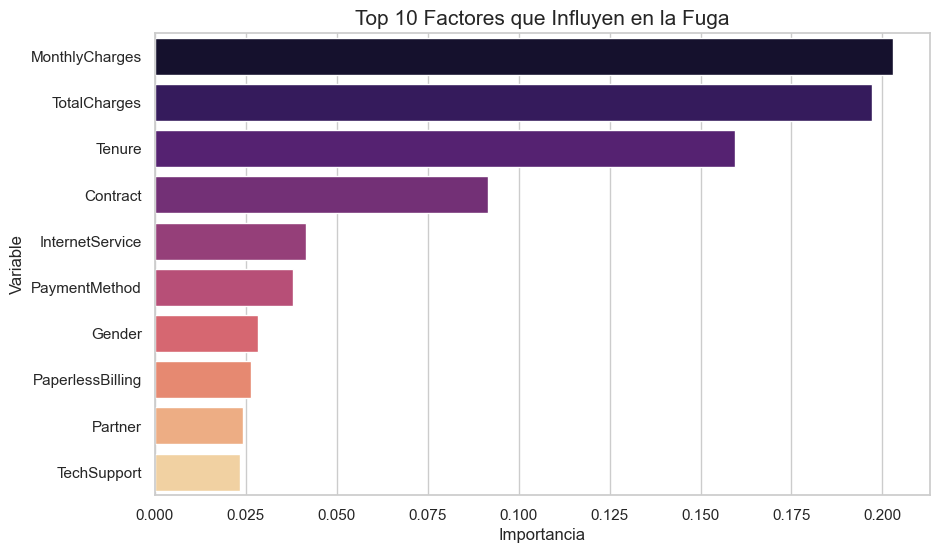

In [8]:
# 1. Obtener la importancia de las variables
importancias = modelo.feature_importances_
variables = X.columns

# 2. Crear un DataFrame para visualizarlo mejor
df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# 3. Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(10), palette='magma')
plt.title('Top 10 Factores que Influyen en la Fuga', fontsize=15)
plt.show()

In [9]:
# 1. Aplicar el modelo a todo el dataset original (limpio)
predicciones_finales = modelo.predict(df_ml.drop('Churn', axis=1))

# 2. Agregar la predicción al DataFrame original
df['Prediccion_Churn'] = predicciones_finales

# 3. Exportar a CSV para cargarlo en Power BI
df.to_csv('resultados_prediccion_churn.csv', index=False)
print("¡Archivo 'resultados_prediccion_churn.csv' generado con éxito!")

¡Archivo 'resultados_prediccion_churn.csv' generado con éxito!
